# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'>랭킹정보 가져오기 </font>

In [1]:
from images import bigpycraft_bda as bpc
from IPython.display import Image 

## 2. 영화 랭킹
> URL ::  https://movie.naver.com/movie/sdb/rank/rmovie.nhn
- 영화랭킹 TOP 10 : 
- 데이터수집 : 순위, 영화명, 변동폭, 평점(관람객/평론가/네티즌), 장르, 감독, 출연, 등급

### <font color='blue'>1단계 : 리스트 크롤링 </font>

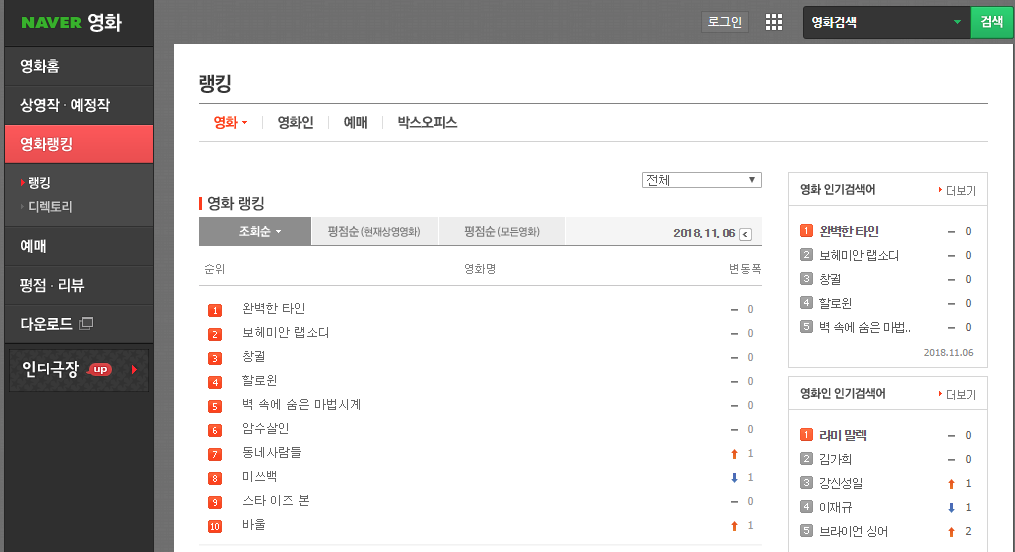

In [2]:
Image(bpc.BDA_PE_413_2)

### <font color='blue'>2단계 : 상세페이지 크롤링 </font>

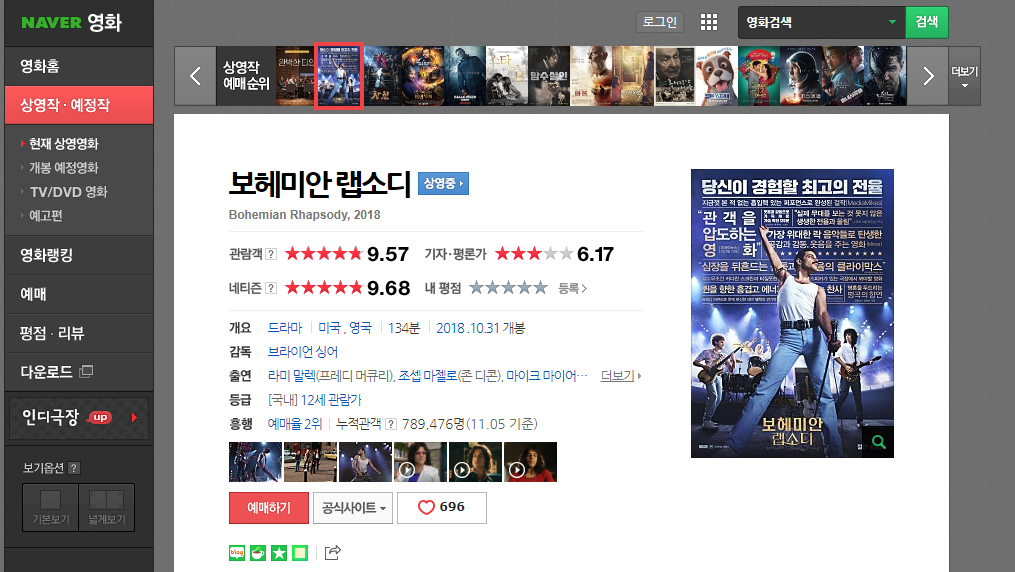

In [3]:
Image(bpc.BDA_PE_413_4)

In [4]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

### <font color='blue'>1단계 : 리스트 크롤링 </font>

In [5]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")
soup.title

<title>랭킹 : 네이버 영화</title>

In [6]:
table_tag = soup.find('table', 'list_ranking')
table_tag["summary"]

'랭킹 테이블'

In [7]:
tbody_tag = table_tag.find('tbody')
type(tbody_tag)

bs4.element.Tag

In [8]:
tr_tags = tbody_tag.find_all('tr')
len(tr_tags)

56

In [9]:
tr_tags[:3]

[<tr><td class="blank01" colspan="8"></td></tr>, <tr>
 <td class="ac"><img alt="01" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_r01.gif" width="14"/></td>
 <td class="title">
 <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=167638" title="완벽한 타인">완벽한 타인</a>
 </div>
 </td>
 <!-- 평점순일 때 평점 추가하기  -->
 <!----------------------------------------->
 <td class="ac"><img alt="na" class="arrow" height="10" src="https://ssl.pstatic.net/imgmovie/2007/img/common/icon_na_1.gif" width="7"/></td>
 <td class="range ac">0</td>
 </tr>, <tr>
 <td class="ac"><img alt="02" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_r02.gif" width="14"/></td>
 <td class="title">
 <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=156464" title="보헤미안 랩소디">보헤미안 랩소디</a>
 </div>
 </td>
 <!-- 평점순일 때 평점 추가하기  -->
 <!----------------------------------------->
 <td class="ac"><img alt="na" class="arrow" height="10" src="https://ssl.pstatic.net/imgmovie/20

In [10]:
tr_tag = tr_tags[1]
td_tags = tr_tag.find_all('td')
td_tags

[<td class="ac"><img alt="01" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_r01.gif" width="14"/></td>,
 <td class="title">
 <div class="tit3">
 <a href="/movie/bi/mi/basic.nhn?code=167638" title="완벽한 타인">완벽한 타인</a>
 </div>
 </td>,
 <td class="ac"><img alt="na" class="arrow" height="10" src="https://ssl.pstatic.net/imgmovie/2007/img/common/icon_na_1.gif" width="7"/></td>,
 <td class="range ac">0</td>]

#### <font color='#00AAFF'>순위 : 이미지의 풍선도움말 (alt)</font>

In [11]:
tmp = tr_tag.find('img')
ranking = tmp['alt']
ranking

'01'

In [12]:
ranking = int(ranking)
ranking

1

#### <font color='#00AAFF'>영화명</font>

In [13]:
td_tag = tr_tag.find('td', 'title')
tmp = td_tag.find('a')
title = tmp.get_text().strip()
title

'완벽한 타인'

#### <font color='#00AAFF'>링크</font>

In [14]:
link = 'https://movie.naver.com' + tmp['href']
link

'https://movie.naver.com/movie/bi/mi/basic.nhn?code=167638'

#### <font color='#00AAFF'>변동폭 : 부호 + 변동값</font>
>  
- 화살표 DOWN : 마이너스
- 화살표 UP : 플러스

In [15]:
tmp = tr_tag.find('td', 'range ac')
range_ac = tmp.get_text().strip()
range_ac

'0'

In [16]:
tmp = tr_tag.find('img', 'arrow')
range_sign = '-' if tmp['alt']=='down' else ''
range_sign

''

In [17]:
range_ac = range_sign + range_ac
range_ac

'0'

In [18]:
def crawl_movie_rank():
    
    Ranking   = []
    Title     = []
    Link      = []
    Range_ac  = []

    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
    html = urlopen(url)
    soup = BeautifulSoup(html, "lxml")

    table_tag = soup.find('table', 'list_ranking')
    tbody_tag = table_tag.find('tbody')
    tr_tags = tbody_tag.find_all('tr')

    for tr_tag in tr_tags[1:11]:
        td_tags = tr_tag.find_all('td')

        tmp = tr_tag.find('img')
        ranking = int(tmp['alt'])        

        td_tag = tr_tag.find('td', 'title')
        tmp = td_tag.find('a')
        title = tmp.get_text().strip()
        title

        link = 'https://movie.naver.com' + tmp['href']
        link

        tmp = tr_tag.find('td', 'range ac')
        range_ac = tmp.get_text().strip()
        range_ac

        tmp = tr_tag.find('img', 'arrow')
        range_sign = '-' if tmp['alt']=='down' else ''
        range_sign
        range_ac = range_sign + range_ac
        range_ac
        
        Ranking.append(ranking)
        Title.append(title)
        Link.append(link)
        Range_ac.append(range_ac)

    data   = {'순위':Ranking, '영화명':Title, '변동폭':Range_ac, '링크':Link }
    ret_df = pd.DataFrame(data)
    
    return ret_df    

In [19]:
df = crawl_movie_rank()
df

,링크,변동폭,순위,영화명
0,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,1,완벽한 타인
1,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,2,보헤미안 랩소디
2,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,3,창궐
3,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2,4,동네사람들
4,https://movie.naver.com/movie/bi/mi/basic.nhn?...,-1,5,할로윈
5,https://movie.naver.com/movie/bi/mi/basic.nhn?...,-1,6,벽 속에 숨은 마법시계
6,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,7,암수살인
7,https://movie.naver.com/movie/bi/mi/basic.nhn?...,3,8,여곡성
8,https://movie.naver.com/movie/bi/mi/basic.nhn?...,-1,9,바울
9,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2,10,신비한 동물들과 그린델왈드의 범죄


In [20]:
df.set_index('순위', inplace=True)
df

,링크,변동폭,영화명
순위,,,
1,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,완벽한 타인
2,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,보헤미안 랩소디
3,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,창궐
4,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2,동네사람들
5,https://movie.naver.com/movie/bi/mi/basic.nhn?...,-1,할로윈
6,https://movie.naver.com/movie/bi/mi/basic.nhn?...,-1,벽 속에 숨은 마법시계
7,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,암수살인
8,https://movie.naver.com/movie/bi/mi/basic.nhn?...,3,여곡성
9,https://movie.naver.com/movie/bi/mi/basic.nhn?...,-1,바울


In [21]:
df.to_csv('data/movie_top10.csv', sep=',', encoding='UTF-8')

### <font color='blue'>2단계 : 상세페이지 크롤링 </font>
> 항목 : 순위, 영화명, 변동폭, **평점(관람객/평론가/네티즌), 장르, 감독, 출연, 등급**

In [22]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [23]:
df = pd.read_csv('data/movie_top10.csv', encoding='UTF-8', index_col='순위')
df

,링크,변동폭,영화명
순위,,,
1,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,완벽한 타인
2,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,보헤미안 랩소디
3,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,창궐
4,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2,동네사람들
5,https://movie.naver.com/movie/bi/mi/basic.nhn?...,-1,할로윈
6,https://movie.naver.com/movie/bi/mi/basic.nhn?...,-1,벽 속에 숨은 마법시계
7,https://movie.naver.com/movie/bi/mi/basic.nhn?...,0,암수살인
8,https://movie.naver.com/movie/bi/mi/basic.nhn?...,3,여곡성
9,https://movie.naver.com/movie/bi/mi/basic.nhn?...,-1,바울


In [24]:
url_page = df['링크'][1]
url_page

'https://movie.naver.com/movie/bi/mi/basic.nhn?code=167638'

In [25]:
html = urlopen(url_page)
soup = BeautifulSoup(html, "lxml")
soup.title

<title>완벽한 타인 : 네이버 영화</title>

In [26]:
tag_infos = soup.find_all('div', 'mv_info')
len(tag_infos)

2

In [27]:
# tag_infos[0] 인경우, 네티즌 평가정보를 못가져 옴
mv_info = tag_infos[1]
# mv_info

### <font color='brown'> Regular Expression 관련 사이트
- http://regexr.com/   : text 정보를 re로 테스트
- https://regexper.com/ : 작성된 re를 다이어그램으로 표현

#### <font color='#00AAFF'>평점 : 관람객 / 평론가 / 네티즌</font>

In [28]:
star_scores = mv_info.find_all('div', 'star_score')
len(star_scores)

5

In [29]:
Scores = list()

for star_score in star_scores:
    each_score = star_score.get_text()
    re_score = re.search('\d{1,2}\.\d{1,2}', each_score)
    
    if re_score is not None:
        score = re_score.group()
        # print('[{}]'.format(score))
        Scores.append(score)
    else :
        pass
        # print('없음')
        

Scores

['9.20', '6.13', '8.87']

In [30]:
if len(Scores) > 2:
    score1 = Scores[0]
    score2 = Scores[1]
    score3 = Scores[2]

"관람객:{} / 평론가:{} / 네티즌{}".format(score1, score2, score3)

'관람객:9.20 / 평론가:6.13 / 네티즌8.87'

#### <font color='#00AAFF'>장르</font>

In [31]:
info_spec = mv_info.find('dl', 'info_spec')
# info_spec = info_spec.get_text()
# info_spec
print(info_spec.prettify())

<dl class="info_spec">
 <dt class="step1">
  <em>
   개요()
  </em>
 </dt>
 <dd>
  <p>
   <span>
    <a href="/movie/sdb/browsing/bmovie.nhn?genre=1">
     드라마
    </a>
    <!-- N=a:ifo.genre -->
    ,
    <a href="/movie/sdb/browsing/bmovie.nhn?genre=11">
     코미디
    </a>
    <!-- N=a:ifo.genre -->
   </span>
   <span>
    <a href="/movie/sdb/browsing/bmovie.nhn?nation=KR">
     한국
    </a>
    <!-- N=a:ifo.nation -->
   </span>
   <span>
    115분
   </span>
   <span>
    <a href="/movie/sdb/browsing/bmovie.nhn?open=2018">
     2018
    </a>
    <!-- N=a:ifo.year -->
    <a href="/movie/sdb/browsing/bmovie.nhn?open=20181031">
     .10.31
    </a>
    <!-- N=a:ifo.day -->
    개봉
   </span>
  </p>
 </dd>
 <dt class="step2">
  <em>
   감독
  </em>
 </dt>
 <dd>
  <p>
   <a href="/movie/bi/pi/basic.nhn?code=15598">
    이재규
   </a>
   <!-- N=a:ifo.director -->
  </p>
 </dd>
 <dt class="step3">
  <em>
   출연
  </em>
 </dt>
 <dd>
  <p>
   <a href="/movie/bi/pi/basic.nhn?code=4431">
    유해진
   </a

In [32]:
genre = mv_info.find_all('dd')
len(genre)

5

In [33]:
genre = mv_info.find_all('dd')[0].get_text()
genre = genre.replace('\n', '')
genre = genre.replace('\r', '')
genre = genre.replace('\t', '')
genre

'드라마, 코미디한국115분  2018.10.31 개봉'

#### <font color='#00AAFF'>감독</font>

In [34]:
director = mv_info.find_all('dd')[1].get_text()
director = director.strip()
director

'이재규'

#### <font color='#00AAFF'>출연</font>

In [35]:
casting = mv_info.find_all('dd')[2].get_text()
casting = casting.replace('더보기', '')
casting = casting.strip()
casting

'유해진(태수), 조진웅(석호), 이서진(준모)'

#### <font color='#00AAFF'>등급</font>

In [36]:
rating = mv_info.find_all('dd')[3].get_text()
rating = rating.replace('\n', '')
rating = rating.replace('\r', '')
rating = rating.replace('\t', '')
rating = rating.strip()
rating


'[국내] 15세 관람가'

#### <font color='#00AAFF'>OK! 이제부터 모듈로 묶자!</font>

In [37]:
from tqdm import tqdm_notebook

In [42]:
def crawl_detail(df) :
    
    Score = []
    Genre = []
    Director = []
    Casting  = []
    Rating   = []  

    for url_page in tqdm_notebook(df['링크']):

        html = urlopen(url_page)
        soup = BeautifulSoup(html, "lxml")

        tag_infos = soup.find_all('div', 'mv_info')
        # tag_infos[0] 인경우, 네티즌 평가정보를 못가져 옴
        mv_info = tag_infos[1]

        # 평점
        star_scores = mv_info.find_all('div', 'star_score')
        tmp_scores = list()

        for star_score in star_scores:
            each_score = star_score.get_text()
            re_score = re.search('\d{1,2}\.\d{1,2}', each_score)

            if re_score is None:
                pass
            else :
                score = re_score.group()
                tmp_scores.append(score)
        else :
            print('tmp_scores:', tmp_scores)
            if len(Scores) > 2:
                score1 = tmp_scores[0]
                score2 = tmp_scores[1]
                score3 = tmp_scores[2]
            else :
                score1 = '-'
                score2 = '-'
                score3 = '-'
                pass

        # score = "관람객:{} / 평론가:{} / 네티즌{}".format(score1, score2, score3)
        score = "{} / {} / {}".format(score1, score2, score3)

        info_spec = mv_info.find('dl', 'info_spec')

        # 장르
        genre = mv_info.find_all('dd')[0].get_text()
        genre = genre.replace('\n', '')
        genre = genre.replace('\r', '')
        genre = genre.replace('\t', '')

        # 감독
        director = mv_info.find_all('dd')[1].get_text()
        director = director.strip()

        # 출연
        casting = mv_info.find_all('dd')[2].get_text()
        casting = casting.replace('더보기', '')
        casting = casting.strip()

        # 등급
        rating = mv_info.find_all('dd')[3].get_text()
        rating = rating.replace('\n', '')
        rating = rating.replace('\r', '')
        rating = rating.replace('\t', '')
        rating = rating.strip()

        Score.append(score)
        Genre.append(genre)
        Director.append(director)
        Casting.append(casting)
        Rating.append(rating)

    df['평점'] = Score
    df['장르'] = Genre
    df['감독'] = Director
    df['출연'] = Casting
    df['등급'] = Rating

    print('Crawling is Finished !!!')
        
    return df

#### <font color='#00AAFF'>크롤링 테스트</font>

In [43]:
result_df = crawl_detail(df)

A Jupyter Widget

tmp_scores: ['9.20', '6.13', '8.87']
tmp_scores: ['9.56', '6.17', '9.67']
tmp_scores: ['7.01', '5.20', '5.49']
tmp_scores: ['8.11', '4.00', '7.45']
tmp_scores: ['7.33', '7.43', '6.54']
tmp_scores: ['8.26', '4.67', '6.42']
tmp_scores: ['8.59', '8.14', '8.33']
tmp_scores: ['3.67', '7.98']



IndexError: list index out of range

In [ ]:
result_df.head()

In [ ]:
result_df.loc[1]

In [ ]:
file_name='data/movie_top10_v2.csv'
df.to_csv(file_name, sep=',', encoding='UTF-8')

#### <font color='#00AAFF'>크롤러 파일 생성</font>

In [ ]:
class CrawlMovieRanking:
    df = pd.DataFrame()
    
    def init(self, name='랭킹정보'):
        self.name = name
        
    def get_df(self):
        return self.df
    
    def set_df(self, df):
        self.df = df
        
    def read_file(self, file_name='data/movie_top10.csv'):
        self.df = pd.read_csv(file_name, encoding='UTF-8', index_col='순위')
        
    def save_file(self, file_name='data/movie_top10_v2.csv'):
        self.df.to_csv(file_name, sep=',', encoding='UTF-8')
        
    def crawl_detail(self):
        Score = []
        Genre = []
        Director = []
        Casting  = []
        Rating   = []  
        
        for url_page in self.df['링크']:
        
            html = urlopen(url_page)
            soup = BeautifulSoup(html, "lxml")

            tag_infos = soup.find_all('div', 'mv_info')
            # tag_infos[0] 인경우, 네티즌 평가정보를 못가져 옴
            mv_info = tag_infos[1]

            # 평점
            star_scores = mv_info.find_all('div', 'star_score')
            tmp_scores = list()

            for star_score in star_scores:
                each_score = star_score.get_text()
                re_score = re.search('\d{1,2}\.\d{1,2}', each_score)

                if re_score is None:
                    pass
                else :
                    score = re_score.group()
                    tmp_scores.append(score)
            else :
                if len(Scores) > 2:
                    score1 = tmp_scores[0]
                    score2 = tmp_scores[1]
                    score3 = tmp_scores[2]
                else :
                    pass

            # score = "관람객:{} / 평론가:{} / 네티즌{}".format(score1, score2, score3)
            score = "{} / {} / {}".format(score1, score2, score3)

            info_spec = mv_info.find('dl', 'info_spec')

            # 장르
            genre = mv_info.find_all('dd')[0].get_text()
            genre = genre.replace('\n', '')
            genre = genre.replace('\r', '')
            genre = genre.replace('\t', '')

            # 감독
            director = mv_info.find_all('dd')[1].get_text()
            director = director.strip()

            # 출연
            casting = mv_info.find_all('dd')[2].get_text()
            casting = casting.replace('더보기', '')
            casting = casting.strip()

            # 등급
            rating = mv_info.find_all('dd')[3].get_text()
            rating = rating.replace('\n', '')
            rating = rating.replace('\r', '')
            rating = rating.replace('\t', '')
            rating = rating.strip()

            Score.append(score)
            Genre.append(genre)
            Director.append(director)
            Casting.append(casting)
            Rating.append(rating)
            
        self.df['평점'] = Score
        self.df['장르'] = Genre
        self.df['감독'] = Director
        self.df['출연'] = Casting
        self.df['등급'] = Rating

        print('Crawling is Finished !!!')

    def do_start(self):
        self.read_file()
        self.crawl_detail()
        self.save_file()
        

In [ ]:
crawler = CrawlMovieRanking()
crawler.do_start()

In [ ]:
crawler.df.loc[1]

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>